# Curate metadata for TARA
##### last updated 12-17-2018

## Download PANGAEA file for TARA data


In [1]:
system("curl -L -o pangaea_tara.zip https://doi.pangaea.de/10.1594/PANGAEA.875582?format=zip") #download zipped folder
system("unzip pangaea_tara.zip") #unpacks the zipped file into 

## Download packages and install

In [3]:
install.packages("reshape2")
install.packages("ggplot2")
install.packages("dplyr")
library(dplyr); library(reshape2); library(ggplot2); #the order of loading matters== because otherwise Rcpp version is messed up
options(repr.plot.width = 5, repr.plot.height = 4) #set plot size output

In [1]:
library(dplyr); library(reshape2); library(ggplot2); 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Import and parse pangea data

In [4]:
# Import pangaea data
env<-read.table('datasets/TARA_SAMPLES_CONTEXT_ENV-WATERCOLUMN.tab', check.names = FALSE,skip = 2522, header = TRUE, sep ='\t')
head(env[1:2,])

"Sample ID (registered at PANGAEA, Data P...)",Sample ID (registered at the BioSamples ...),Sample ID (registered at the European Nu...),Basis,Campaign,Station,Device,Event,Date/Time,Latitude,⋯,u [cm/s],v [cm/s],OW,MLE [1/day],RT [days],Latitude (of the continental shelf with...),Longitude (of the continental shelf with...),Age [days],Latitude (of the geographic coordinate ...),Longitude (of the geographic coordinate ...)
TARA_X000000174,SAMEA4402502,ERS1313951,SV Tara,TARA_20090905Z,TARA_001,"Plankton net, type=Bongo, mesh(µm)=300, mouth(m^2)=0.258319, length(m)=3",TARA_20090907T1530Z_001_EVENT_NET,2009-09-07T15:30,44.4013,⋯,-3.855836,-8.864694,-0.11994,0.075851,10.97222,NA,NA,120,44.48297,-10.34875
TARA_X000000173,SAMEA4402503,ERS1313952,SV Tara,TARA_20090905Z,TARA_001,"Plankton net+sieve, type=Double, mesh(µm)=20, mouth(m^2)=0.192442, length(m)=2.5",TARA_20090907T1610Z_001_EVENT_NET,2009-09-07T16:10,44.4013,⋯,-3.855836,-8.864694,-0.11994,0.075851,10.97222,NA,NA,120,44.48297,-10.34875


### Look at column names of PANGEA input table


In [4]:
colnames(env)[1]<-"sample_alias"
as.list(colnames(env)) # Look for duplicated names or errors

[[1]]
[1] "sample_alias"

[[2]]
[1] "Sample ID (registered at the BioSamples ...)"

[[3]]
[1] "Sample ID (registered at the European Nu...)"

[[4]]
[1] "Basis"

[[5]]
[1] "Campaign"

[[6]]
[1] "Station"

[[7]]
[1] "Device"

[[8]]
[1] "Event"

[[9]]
[1] "Date/Time"

[[10]]
[1] "Latitude"

[[11]]
[1] "Longitude"

[[12]]
[1] "Env feature"

[[13]]
[1] "Depth, nominal"

[[14]]
[1] "Depth top [m]"

[[15]]
[1] "Depth bot [m]"

[[16]]
[1] "Fraction lower [µm]"

[[17]]
[1] "Fraction upper [µm]"

[[18]]
[1] "Sample material"

[[19]]
[1] "Sample method"

[[20]]
[1] "Sample label"

[[21]]
[1] "MP biome"

[[22]]
[1] "OS region"

[[23]]
[1] "BG province"

[[24]]
[1] "Sea ice conc [%]"

[[25]]
[1] "Sea ice free period start DOY [day]"

[[26]]
[1] "Sea Ice free period [days]"

[[27]]
[1] "Sea ice free period end DOY [day]"

[[28]]
[1] "Season (at the sampling location and ...)"

[[29]]
[1] "Season (at the sampling location and ...)"

[[30]]
[1] "Moon phase nominal"

[[31]]
[1] "Moon phase proportion"

[[32]]
[1] "Time of day"

[[33]]
[1] "SSD [min]"

[[34]]
[1] "PAR day [mol quanta/m**2/day] (at the sampling location and ...)"

[[35]]
[1] "PAR day [mol quanta/m**2/day] (calculated from AMODIS produc...)"

[[36]]
[1] "PAR day [mol quanta/m**2/day] (Calculated from GlobColour pr...)"

[[37]]
[1] "PAR day [mol quanta/m**2/day] (at the sampling location for ...)"

[[38]]
[1] "SST grad h [°C/100 km] (calculated from AMODIS products)"

[[39]]
[1] "Fe tot [µmol/l]"

[[40]]
[1] "Fe std dev [±]"

[[41]]
[1] "[NH4]+ [µmol/l]"

[[42]]
[1] "[NH4]+ std dev [±]"

[[43]]
[1] "[NO2]- [µmol/l]"

[[44]]
[1] "[NO2]- std dev [±]"

[[45]]
[1] "[NO3]- [µmol/l]"

[[46]]
[1] "NO3 std dev [±]"

[[47]]
[1] "SSfCDOM [ppb (QSE)]"

[[48]]
[1] "SSChla [mg/m**3]"

[[49]]
[1] "Chl a conc [mg/m**2]"

[[50]]
[1] "Ssphi sat [%]"

[[51]]
[1] "NPP C [mg/m**2/day] (Calculated using the Arctic-a...)"

[[52]]
[1] "NPP C [mg/m**2/day] (calculated from VGPM products)"

[[53]]
[1] "TSS [mg/l]"

[[54]]
[1] "POC [µg/kg]"

[[55]]
[1] "PIC [mol/m**3]"

[[56]]
[1] "Bathy depth [m]"

[[57]]
[1] "Latitude (of the closest geographic coo...)"

[[58]]
[1] "Longitude (of the closest geographic coo...)"

[[59]]
[1] "Distance [km]"

[[60]]
[1] "SST grad h [°C/100 km] (at the sampling location and ...)"

[[61]]
[1] "SSM index [1/s**2]"

[[62]]
[1] "u [cm/s]"

[[63]]
[1] "v [cm/s]"

[[64]]
[1] "OW"

[[65]]
[1] "MLE [1/day]"

[[66]]
[1] "RT [days]"

[[67]]
[1] "Latitude (of the continental shelf with...)"

[[68]]
[1] "Longitude (of the continental shelf with...)"

[[69]]
[1] "Age [days]"

[[70]]
[1] "Latitude (of the geographic coordinate ...)"

[[71]]
[1] "Longitude (of the geographic coordinate ...)"

### Column names need to be unique


In [5]:
colnames(env)[28:29]<-c("Season (at the sampling location)", "Season (timing at sampling location)")

## Import the datasheets from the EMBL/ENA

In [2]:
# Import sheets downloaded from EMBL
metag<-read.table("ENA_tables/PRJEB4352_metaG.txt", check.names = FALSE, sep="\t", header=TRUE)
metat<-read.table("ENA_tables/PRJEB6609_metaT.txt", check.names = FALSE, sep="\t", header=TRUE)
# head(metag[1:2,]); head(metat[1:2,])

## Merge metagenome datasheet from ENA with PANGEA data

In [10]:
# Join metagenome information with pangea metadata
metag_wenv<-inner_join(metag, env, by="sample_alias")
dim(metag_wenv)
head(metag_wenv[1:2,])

Warning message:
“Column `sample_alias` joining factors with different levels, coercing to character vector”

[1] 823  95

study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,tax_id,scientific_name,instrument_model,library_layout,read_count,⋯,u [cm/s],v [cm/s],OW,MLE [1/day],RT [days],Latitude (of the continental shelf with...),Longitude (of the continental shelf with...),Age [days],Latitude (of the geographic coordinate ...),Longitude (of the geographic coordinate ...)
PRJEB4352,SAMEA2656965,ERS488900,ERX1771177,ERR1700889,408172,marine metagenome,Illumina HiSeq 2000,PAIRED,176898786,⋯,-0.557961,15.04659,0.403157,NA,2.25000,NA,NA,120,16.58333,63.62541
PRJEB4352,SAMEA2620205,ERS489054,ERX1771189,ERR1700890,408172,marine metagenome,Illumina HiSeq 2000,PAIRED,167352614,⋯,-0.466550,4.30608,-0.412443,0.026178,19.02778,NA,NA,120,14.40466,69.68938


In [11]:
# Join metatranscriptome information with pangea metadata
metat_wenv<-inner_join(metat, env, by="sample_alias")
dim(metat_wenv)
head(metat_wenv[1:2,])

Warning message:
“Column `sample_alias` joining factors with different levels, coercing to character vector”

[1] 860  94

study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,tax_id,scientific_name,instrument_model,library_layout,read_count,⋯,u [cm/s],v [cm/s],OW,MLE [1/day],RT [days],Latitude (of the continental shelf with...),Longitude (of the continental shelf with...),Age [days],Latitude (of the geographic coordinate ...),Longitude (of the geographic coordinate ...)
PRJEB6609,SAMEA2621263,ERS490668,ERX1086442,ERR1007415,408172,marine metagenome,Illumina HiSeq 2000,PAIRED,18297963,⋯,8.645021,-6.421140,0.053558,0.148190,5.777778,-41.64723,-23.74177,68,-24.63124,-42.96371
PRJEB6609,SAMEA2621208,ERS490552,ERX1086441,ERR1007416,408172,marine metagenome,Illumina HiSeq 2000,PAIRED,14699334,⋯,0.479170,2.691546,0.084131,0.027592,0.000000,NA,NA,120,-21.59996,-34.64267


In [17]:
# Save output:

write.table(metat_wenv, file="ENA_tables/PRJEB6609_metaT_wenv.txt", row.names=FALSE, quote=FALSE, sep="\t")
write.table(metag_wenv, file="ENA_tables/PRJEB4352_metaG_wenv.txt", row.names=FALSE, quote=FALSE, sep="\t")



In [4]:
metag<-read.delim("ENA_tables/PRJEB4352_metaG_wenv_PE.txt",header=T) # WIP - update with proper location
colnames(metag)

[1] "X"                                                               
 [2] "study_accession"                                                 
 [3] "sample_accession"                                                
 [4] "secondary_sample_accession"                                      
 [5] "experiment_accession"                                            
 [6] "run_accession"                                                   
 [7] "tax_id"                                                          
 [8] "scientific_name"                                                 
 [9] "instrument_model"                                                
[10] "library_layout"                                                  
[11] "read_count"                                                      
[12] "base_count"                                                      
[13] "experiment_title"                                                
[14] "study_title"                                                     
[15] "experiment_alias"                                                
[16] "run_alias"                                                       
[17] "fastq_bytes"                                                     
[18] "fastq_md5"                                                       
[19] "fastq_ftp"                                                       
[20] "submitted_ftp"                                                   
[21] "submitted_galaxy"                                                
[22] "sra_ftp"                                                         
[23] "sra_galaxy"                                                      
[24] "cram_index_galaxy"                                               
[25] "sample_alias"                                                    
[26] "sample_title"                                                    
[27] "Sample.ID..registered.at.the.BioSamples....."                    
[28] "Sample.ID..registered.at.the.European.Nu...."                    
[29] "Basis"                                                           
[30] "Campaign"                                                        
[31] "Station"                                                         
[32] "Device"                                                          
[33] "Event"                                                           
[34] "Date.Time"                                                       
[35] "Latitude"                                                        
[36] "Longitude"                                                       
[37] "Env.feature"                                                     
[38] "Depth..nominal"                                                  
[39] "Depth.top..m."                                                   
[40] "Depth.bot..m."                                                   
[41] "Fraction.lower..µm."                                             
[42] "Fraction.upper..µm."                                             
[43] "Sample.material"                                                 
[44] "Sample.method"                                                   
[45] "Sample.label"                                                    
[46] "MP.biome"                                                        
[47] "OS.region"                                                       
[48] "BG.province"                                                     
[49] "Sea.ice.conc...."                                                
[50] "Sea.ice.free.period.start.DOY..day."                             
[51] "Sea.Ice.free.period..days."                                      
[52] "Sea.ice.free.period.end.DOY..day."                               
[53] "Season..at.the.sampling.location."                               
[54] "Season..timing.at.sampling.location."                            
[55] "Moon.phase.nominal"                                              
[56] "Moon.phase.proportion"             

In [3]:
metat<-read.delim("ENA_tables/PRJEB6609_metaT_wenv_PE.txt",header=T) # WIP - update with proper location
colnames(metat)

[1] "X"                                                               
 [2] "study_accession"                                                 
 [3] "sample_accession"                                                
 [4] "secondary_sample_accession"                                      
 [5] "experiment_accession"                                            
 [6] "run_accession"                                                   
 [7] "tax_id"                                                          
 [8] "scientific_name"                                                 
 [9] "instrument_model"                                                
[10] "library_layout"                                                  
[11] "read_count"                                                      
[12] "base_count"                                                      
[13] "experiment_title"                                                
[14] "study_title"                                                     
[15] "run_alias"                                                       
[16] "fastq_bytes"                                                     
[17] "fastq_md5"                                                       
[18] "fastq_ftp"                                                       
[19] "submitted_ftp"                                                   
[20] "submitted_galaxy"                                                
[21] "sra_ftp"                                                         
[22] "sra_galaxy"                                                      
[23] "cram_index_galaxy"                                               
[24] "sample_alias"                                                    
[25] "sample_title"                                                    
[26] "Sample.ID..registered.at.the.BioSamples....."                    
[27] "Sample.ID..registered.at.the.European.Nu...."                    
[28] "Basis"                                                           
[29] "Campaign"                                                        
[30] "Station"                                                         
[31] "Device"                                                          
[32] "Event"                                                           
[33] "Date.Time"                                                       
[34] "Latitude"                                                        
[35] "Longitude"                                                       
[36] "Env.feature"                                                     
[37] "Depth..nominal"                                                  
[38] "Depth.top..m."                                                   
[39] "Depth.bot..m."                                                   
[40] "Fraction.lower..µm."                                             
[41] "Fraction.upper..µm."                                             
[42] "Sample.material"                                                 
[43] "Sample.method"                                                   
[44] "Sample.label"                                                    
[45] "MP.biome"                                                        
[46] "OS.region"                                                       
[47] "BG.province"                                                     
[48] "Sea.ice.conc...."                                                
[49] "Sea.ice.free.period.start.DOY..day."                             
[50] "Sea.Ice.free.period..days."                                      
[51] "Sea.ice.free.period.end.DOY..day."                               
[52] "Season..at.the.sampling.location."                               
[53] "Season..timing.at.sampling.location."                            
[54] "Moon.phase.nominal"                                              
[55] "Moon.phase.proportion"                                           
[56] "Time.of.day"                       

## Further curate metadata information to group samples for assembly purposes.

In [5]:
# Import combined text file with sample list and metadata
metag<-read.delim("ENA_tables/PRJEB4352_metaG_wenv_PE.txt",header=T) # WIP - update with proper location
# Create size fraction colum
metag$size_frac<-paste(metag$Fraction.lower..µm., metag$Fraction.upper..µm., sep="-")
# Subset to columns we need
metag_subset<-data.frame(metag$study_accession, 
                         metag$run_accession, 
                         metag$Station, 
                         metag$size_frac,
                         metag$Env.feature, 
                         metag$Sample.material,
                         metag$Depth..nominal,
                         metag$OS.region, 
                         metag$BG.province,
                         metag$Latitude, metag$Longitude)
names(metag_subset)
head(metag_subset[1:2,])

[1] "metag.study_accession" "metag.run_accession"   "metag.Station"        
 [4] "metag.size_frac"       "metag.Env.feature"     "metag.Sample.material"
 [7] "metag.Depth..nominal"  "metag.OS.region"       "metag.BG.province"    
[10] "metag.Latitude"        "metag.Longitude"

metag.study_accession,metag.run_accession,metag.Station,metag.size_frac,metag.Env.feature,metag.Sample.material,metag.Depth..nominal,metag.OS.region,metag.BG.province,metag.Latitude,metag.Longitude
PRJEB4352,ERR1700889,TARA_039,180-2000.00,[SRF] surface water layer (ENVO:00010504),TARA_039_SRF_180-2000,5,[IO] Indian Ocean (MRGID:1904),[MONS] Indian Monsoon Gyres Province (MRGID:21471),18.5743,66.5029
PRJEB4352,ERR1700890,TARA_041,5-20.00,[SRF] surface water layer (ENVO:00010504),TARA_041_SRF_5-20,5,[IO] Indian Ocean (MRGID:1904),[MONS] Indian Monsoon Gyres Province (MRGID:21471),14.6059,69.9776


In [6]:
# Import combined text file with sample list and metadata
metat<-read.delim("ENA_tables/PRJEB6609_metaT_wenv_PE.txt",header=T) 
# Create size fraction colum
metat$size_frac<-paste(metat$Fraction.lower..µm., metat$Fraction.upper..µm., sep="-")
# Subset to columns we need
metat_subset<-data.frame(metat$study_accession, 
                         metat$run_accession, 
                         metat$Station, 
                         metat$size_frac,
                         metat$Env.feature, 
                         metat$Sample.material,
                         metat$Depth..nominal,
                         metat$OS.region, 
                         metat$BG.province,
                         metat$Latitude, metat$Longitude)
names(metat_subset)
head(metat_subset[1:2,])

[1] "metat.study_accession" "metat.run_accession"   "metat.Station"        
 [4] "metat.size_frac"       "metat.Env.feature"     "metat.Sample.material"
 [7] "metat.Depth..nominal"  "metat.OS.region"       "metat.BG.province"    
[10] "metat.Latitude"        "metat.Longitude"

metat.study_accession,metat.run_accession,metat.Station,metat.size_frac,metat.Env.feature,metat.Sample.material,metat.Depth..nominal,metat.OS.region,metat.BG.province,metat.Latitude,metat.Longitude
PRJEB6609,ERR1007415,TARA_078,0.8->0.80,[SRF] surface water layer (ENVO:00010504),TARA_078_SRF_0.8->,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.1367,-43.2899
PRJEB6609,ERR1007416,TARA_076,0.8->0.80,[SRF] surface water layer (ENVO:00010504),TARA_076_SRF_0.8->,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-20.9354,-35.1803


In [7]:
unique(metag_subset$metag.size_frac) # need to simplify to 4 size fractions

[1] 180-2000.00 5-20.00     3->3.00     20-180.00   0.8->0.80   3->5.00    
 [7] 0.8-5.00    0.8-20.00   0.22-3.00   0.8-3.00   
10 Levels: 0.22-3.00 0.8->0.80 0.8-20.00 0.8-3.00 0.8-5.00 ... 5-20.00

In [8]:
unique(metat_subset$metat.size_frac) # need to simplify to 4 size fractions

[1] 0.8->0.80   5-20.00     20-180.00   0.8-5.00    3->3.00     180-2000.00
[7] 0.8-3.00    0.8-20.00   3->5.00    
9 Levels: 0.8->0.80 0.8-20.00 0.8-3.00 0.8-5.00 180-2000.00 ... 5-20.00

In [9]:
# Revise size fraction groups, group to 4 size fractions total.
size_frac_update<-function(df){
    df2<-subset(df, !(metag.size_frac %in% "0.22-3.00")) # remove single occurence
    df2$Size_fraction<-df2$metag.size_frac
    fracs<-as.character(unique(df$metag.size_frac))
    to0.8<-fracs[grep("0.8", fracs)]
    df2$Size_fraction[df2$metag.size_frac %in% to0.8]="0.8-5.00"
    to3<-fracs[grep("3", fracs)]
    df2$Size_fraction[df2$metag.size_frac %in% to3]="0.8-5.00"
    return(df2)
}
metag_subset_sizefrac<-size_frac_update(metag_subset)
# Summary of updated size fractions:
## Original size fraction - frequency
as.data.frame(table(metag_subset$metag.size_frac))
## New distribution of size fractions
as.data.frame(table(metag_subset_sizefrac$Size_fraction))
#
names(metag_subset_sizefrac)

Var1,Freq
0.22-3.00,1
0.8->0.80,79
0.8-20.00,7
0.8-3.00,34
0.8-5.00,204
180-2000.00,179
20-180.00,167
3->3.00,14
3->5.00,1
5-20.00,136


Var1,Freq
0.22-3.00,0
0.8->0.80,0
0.8-20.00,0
0.8-3.00,0
0.8-5.00,339
180-2000.00,179
20-180.00,167
3->3.00,0
3->5.00,0
5-20.00,136


[1] "metag.study_accession" "metag.run_accession"   "metag.Station"        
 [4] "metag.size_frac"       "metag.Env.feature"     "metag.Sample.material"
 [7] "metag.Depth..nominal"  "metag.OS.region"       "metag.BG.province"    
[10] "metag.Latitude"        "metag.Longitude"       "Size_fraction"

In [10]:
# Revise size fraction groups, group to 4 size fractions total.
size_frac_update<-function(df){
    df2 <- df
    df2$Size_fraction<-df2$metat.size_frac
    fracs<-as.character(unique(df$metat.size_frac))
    to0.8<-fracs[grep("0.8", fracs)]
    df2$Size_fraction[df2$metat.size_frac %in% to0.8]="0.8-5.00"
    to3<-fracs[grep("3", fracs)]
    df2$Size_fraction[df2$metat.size_frac %in% to3]="0.8-5.00"
    return(df2)
}
metat_subset_sizefrac<-size_frac_update(metat_subset)
# Summary of updated size fractions:
## Original size fraction - frequency
as.data.frame(table(metat_subset$metat.size_frac))
## New distribution of size fractions
as.data.frame(table(metat_subset_sizefrac$Size_fraction))
#
names(metat_subset_sizefrac)

Var1,Freq
0.8->0.80,109
0.8-20.00,7
0.8-3.00,14
0.8-5.00,174
180-2000.00,183
20-180.00,178
3->3.00,10
3->5.00,2
5-20.00,164


Var1,Freq
0.8->0.80,0
0.8-20.00,0
0.8-3.00,0
0.8-5.00,316
180-2000.00,183
20-180.00,178
3->3.00,0
3->5.00,0
5-20.00,164


[1] "metat.study_accession" "metat.run_accession"   "metat.Station"        
 [4] "metat.size_frac"       "metat.Env.feature"     "metat.Sample.material"
 [7] "metat.Depth..nominal"  "metat.OS.region"       "metat.BG.province"    
[10] "metat.Latitude"        "metat.Longitude"       "Size_fraction"

ERROR: Error in df$size_frac: object of type 'closure' is not subsettable


In [10]:
# Depth vs. env feature
env_bynominaldepth<- metag_subset_sizefrac %>%
    group_by(metag.Env.feature) %>%
    summarize(Range_min=paste(min(metag.Depth..nominal)),
              Range_max=paste(max(metag.Depth..nominal)),
              Uniqdepths_count=paste(length(unique(metag.Depth..nominal))),
              list=paste(unique(metag.Depth..nominal),collapse=", "),
              ERR_count=paste(length(unique(metag.run_accession))),
              ERR_list=paste(unique(metag.run_accession),collapse=", "))%>%
    as.data.frame
#head(env_bynominaldepth[1:2,])
#write.table(env_bynominaldepth, file="EnvFeature_depthrange.txt", row.names=FALSE, quote=FALSE, sep="\t")
env_bynominaldepth[c(1:4,6)]

metag.Env.feature,Range_min,Range_max,Uniqdepths_count,ERR_count
[DCM] deep chlorophyll maximum layer (ENVO:01000326),17,188,31,282
"[FSW] filtered sea water, used to control protocols",2,2,1,2
[MES] marine water layer (ENVO:01000295) within the mesopelagic zone (ENVO:00000213),250,1000,25,47
[MIX] marine epipelagic wind mixed layer (ENVO:01000061),25,150,5,23
[SRF] surface water layer (ENVO:00010504),5,9,2,461
[ZZZ] marine water layer (ENVO:01000295),25,105,4,6


In [11]:
# List of ocean regions and provinces included in each.
province_sum<-metag_subset_sizefrac %>%
    group_by(metag.OS.region) %>%
    summarize(Prov_count=paste(length(unique(metag.BG.province))),
             Prov_list=paste(unique(metag.BG.province),collapse=", "),
              ERR_count=paste(length(unique(metag.run_accession))),
              ERR_list=paste(unique(metag.run_accession),collapse=", ")
             ) %>%
    as.data.frame
#head(province_sum[1:2,])
province_sum[c(1:4)]

metag.OS.region,Prov_count,Prov_list,ERR_count
[IO] Indian Ocean (MRGID:1904),4,"[MONS] Indian Monsoon Gyres Province (MRGID:21471), [ARAB] Northwest Arabian Sea Upwelling Province (MRGID:21475), [ISSG] Indian South Subtropical Gyre Province (MRGID:21472), [EAFR] Eastern Africa Coastal Province (MRGID:21473)",127
[MS] Mediterranean Sea (MRGID:1905),1,"[MEDI] Mediterranean Sea, Black Sea Province (MRGID:21465)",83
[NAO] North Atlantic Ocean (MRGID:1912),5,"[CARB] Caribbean Province (MRGID:21466), [CHSB] Cheasapeake Bay Province, [NAST-E] North Atlantic Subtropical Gyral Province (MRGID:21467), [NAST-W] North Atlantic Subtropical Gyral Province (MRGID:21455), [GFST] Gulf Stream Province (MRGID:21454)",101
[NPO] North Pacific Ocean (MRGID:1908),5,"[PNEC] North Pacific Equatorial Countercurrent Province (MRGID:21488), [NPST] North Pacific Subtropical and Polar Front Provinces (MRGID:21484), [CHIL] Chile-Peru Current Coastal Province (MRGID:21495), [NPTG] North Pacific Tropical Gyre Province (MRGID:21487), [OCAL] Offshore California Current (MRGID:21493)",107
[RS] Red Sea (MRGID:4264),1,"[REDS] Red Sea, Persian Gulf Province (MRGID:21474)",24
[SAO] South Atlantic Ocean (MRGID:1914),5,"[FKLD] Southwest Atlantic Shelves Province (MRGID:21469), [SSTC] South Subtropical Convergence Province (MRGID:21500), [SATL] South Atlantic Gyral Province (MRGID:21459), [BRAZ] Brazil Current Coastal Province (MRGID:21468), [BENG] Benguela Current Coastal Province (MRGID:21470)",138
[SO] Southern Ocean (MRGID:1907),2,"[APLR] Austral Polar Province (MRGID:21503), [ANTA] Antarctic Province (MRGID:21502)",30
[SPO] South Pacific Ocean (MRGID:1910),3,"[SPSG] South Pacific Subtropical Gyre Province, North and South (MRGID:21486), [CHIL] Chile-Peru Current Coastal Province (MRGID:21495), [PEOD] Pacific Equatorial Divergence Province (MRGID:21489)",211


In [12]:
plot_variables<- function (df, Var1, Var2) 
{
    ggplot(df, aes(x = Var1, fill = Var2)) + labs(x = "", y = "Total number") + 
        geom_bar() + scale_fill_brewer(palette = "PiYG") + theme_minimal() + 
        coord_flip() + theme(legend.position = "bottom", legend.direction="vertical") + NULL
}
# Input Var1 and Var2:
names(metag_subset_sizefrac)

[1] "metag.study_accession" "metag.run_accession"   "metag.Station"        
 [4] "metag.size_frac"       "metag.Env.feature"     "metag.Sample.material"
 [7] "metag.Depth..nominal"  "metag.OS.region"       "metag.BG.province"    
[10] "metag.Latitude"        "metag.Longitude"       "Size_fraction"

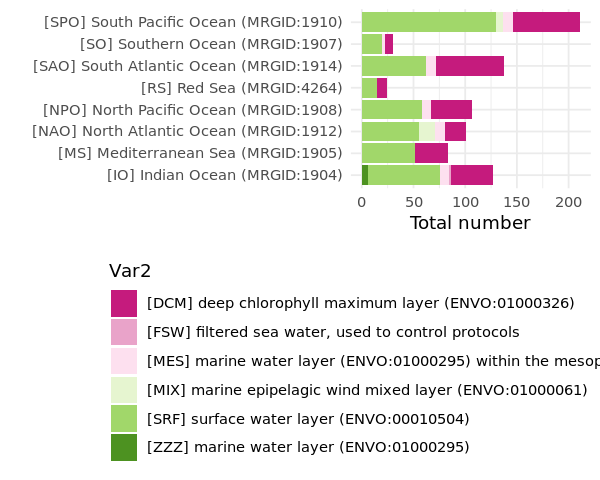

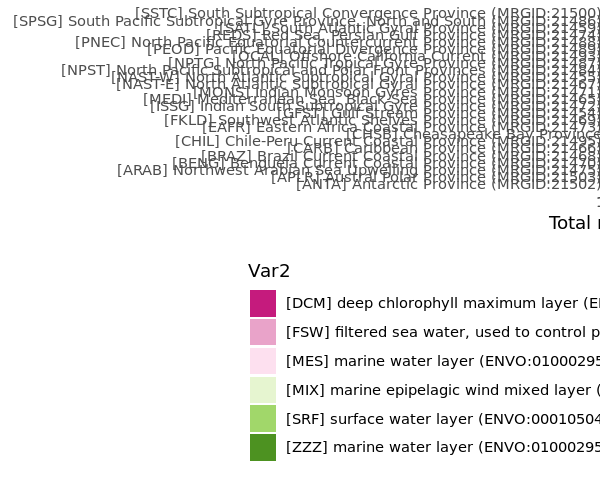

In [13]:
# How many depths per ocean region?
plot_variables(metag_subset_sizefrac, metag_subset_sizefrac$metag.OS.region, metag_subset_sizefrac$metag.Env.feature)
# How many depths per province?
plot_variables(metag_subset_sizefrac, metag_subset_sizefrac$metag.BG.province, metag_subset_sizefrac$metag.Env.feature)

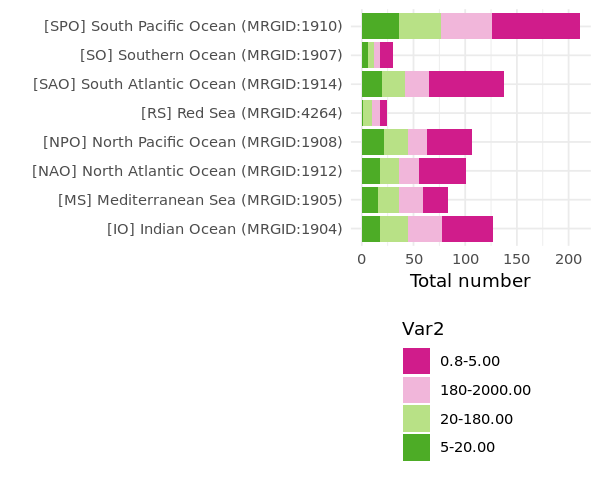

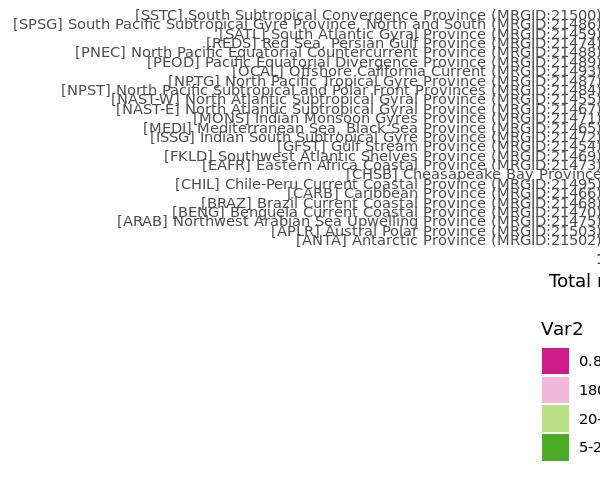

In [14]:
# For each ocean region & province, how many size fractions are there?
plot_variables(metag_subset_sizefrac, metag_subset_sizefrac$metag.OS.region, metag_subset_sizefrac$Size_fraction)
plot_variables(metag_subset_sizefrac, metag_subset_sizefrac$metag.BG.province, metag_subset_sizefrac$Size_fraction)

In [28]:
head(metag_subset_sizefrac[1:3,])
#write.table(metag_subset_sizefrac, file="samples_wlatlong.txt", row.names=FALSE, quote=FALSE, sep="\t")

metag.study_accession,metag.run_accession,metag.Station,metag.size_frac,metag.Env.feature,metag.Sample.material,metag.Depth..nominal,metag.OS.region,metag.BG.province,metag.Latitude,metag.Longitude,Size_fraction
PRJEB4352,ERR1700889,TARA_039,180-2000.00,[SRF] surface water layer (ENVO:00010504),TARA_039_SRF_180-2000,5,[IO] Indian Ocean (MRGID:1904),[MONS] Indian Monsoon Gyres Province (MRGID:21471),18.5743,66.5029,180-2000.00
PRJEB4352,ERR1700890,TARA_041,5-20.00,[SRF] surface water layer (ENVO:00010504),TARA_041_SRF_5-20,5,[IO] Indian Ocean (MRGID:1904),[MONS] Indian Monsoon Gyres Province (MRGID:21471),14.6059,69.9776,5-20.00
PRJEB4352,ERR1700891,TARA_142,5-20.00,[DCM] deep chlorophyll maximum layer (ENVO:01000326),TARA_142_DCM_5-20,125,[NAO] North Atlantic Ocean (MRGID:1912),[CARB] Caribbean Province (MRGID:21466),25.6168,-88.4532,5-20.00


In [29]:
# Generate new text file to group files for assembly
# Grouping by ocean region and province, feature/depth, and size fraction
groupby_region_feat_sizefrac<- metag_subset_sizefrac %>%
    group_by(metag.OS.region, metag.BG.province, metag.Env.feature, Size_fraction) %>%
    summarize(ERR_count=paste(length(unique(metag.run_accession))),
              ERR_list=paste(unique(metag.run_accession),collapse=", "))%>%
    mutate(assembly_grp=paste(sub(".*\\[(.*)\\].*", "\\1", metag.OS.region, perl=TRUE), 
                              sub(".*\\[(.*)\\].*", "\\1", metag.BG.province, perl=TRUE),
                              sub(".*\\[(.*)\\].*", "\\1", metag.Env.feature, perl=TRUE),
                              Size_fraction, sep="-"))%>%
    as.data.frame
# Need to include one other line above to group samples so that ERR counts are parsed again.
dim(groupby_region_feat_sizefrac)[1] # Total assemblies
range(as.numeric(groupby_region_feat_sizefrac$ERR_count)) #max min of ERR sample input
# head(groupby_region_feat_sizefrac)

[1] 220

[1]  1 33

In [16]:
metat_subset_sizefrac

metat.study_accession,metat.run_accession,metat.Station,metat.size_frac,metat.Env.feature,metat.Sample.material,metat.Depth..nominal,metat.OS.region,metat.BG.province,metat.Latitude,metat.Longitude,Size_fraction
PRJEB6609,ERR1007415,TARA_078,0.8->0.80,[SRF] surface water layer (ENVO:00010504),TARA_078_SRF_0.8->,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.1367,-43.2899,0.8-5.00
PRJEB6609,ERR1007416,TARA_076,0.8->0.80,[SRF] surface water layer (ENVO:00010504),TARA_076_SRF_0.8->,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-20.9354,-35.1803,0.8-5.00
PRJEB6609,ERR1007417,TARA_078,0.8->0.80,[DCM] deep chlorophyll maximum layer (ENVO:01000326),TARA_078_DCM_0.8->,120,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.1484,-43.2705,0.8-5.00
PRJEB6609,ERR1007418,TARA_076,0.8->0.80,[DCM] deep chlorophyll maximum layer (ENVO:01000326),TARA_076_DCM_0.8->,150,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-21.0292,-35.3498,0.8-5.00
PRJEB6609,ERR1013384,TARA_078,5-20.00,[SRF] surface water layer (ENVO:00010504),TARA_078_SRF_5-20,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.2163,-43.2750,5-20.00
PRJEB6609,ERR1013385,TARA_078,5-20.00,[SRF] surface water layer (ENVO:00010504),TARA_078_SRF_5-20,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.2163,-43.2750,5-20.00
PRJEB6609,ERR1711860,TARA_011,20-180.00,[SRF] surface water layer (ENVO:00010504),TARA_011_SRF_20-180,9,[MS] Mediterranean Sea (MRGID:1905),"[MEDI] Mediterranean Sea, Black Sea Province (MRGID:21465)",41.6663,2.7994,20-180.00
PRJEB6609,ERR1711861,TARA_039,0.8-5.00,[DCM] deep chlorophyll maximum layer (ENVO:01000326),TARA_039_DCM_0.8-5,25,[IO] Indian Ocean (MRGID:1904),[MONS] Indian Monsoon Gyres Province (MRGID:21471),18.5839,66.4727,0.8-5.00
PRJEB6609,ERR1711862,TARA_102,5-20.00,[DCM] deep chlorophyll maximum layer (ENVO:01000326),TARA_102_DCM_5-20,40,[SPO] South Pacific Ocean (MRGID:1910),[PEOD] Pacific Equatorial Divergence Province (MRGID:21489),-5.2669,-85.2732,5-20.00
PRJEB6609,ERR1711863,TARA_078,20-180.00,[DCM] deep chlorophyll maximum layer (ENVO:01000326),TARA_078_DCM_20-180,120,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.1403,-43.2641,20-180.00


In [30]:
# write.table(groupby_region_feat_sizefrac, file="grouped_samples.txt", row.names=FALSE, quote=FALSE, sep="\t")
## Decide on which ocean regions should be split or kept together
unique(metag_subset_sizefrac$metag.OS.region)
unique(metag_subset_sizefrac$metag.BG.province)

[1] [IO] Indian Ocean (MRGID:1904)         
[2] [NAO] North Atlantic Ocean (MRGID:1912)
[3] [MS] Mediterranean Sea (MRGID:1905)    
[4] [SPO] South Pacific Ocean (MRGID:1910) 
[5] [SAO] South Atlantic Ocean (MRGID:1914)
[6] [NPO] North Pacific Ocean (MRGID:1908) 
[7] [RS] Red Sea (MRGID:4264)              
[8] [SO] Southern Ocean (MRGID:1907)       
8 Levels: [IO] Indian Ocean (MRGID:1904) ...

[1] [MONS] Indian Monsoon Gyres Province (MRGID:21471)                           
 [2] [CARB] Caribbean Province (MRGID:21466)                                      
 [3] [CHSB] Cheasapeake Bay Province                                              
 [4] [MEDI] Mediterranean Sea, Black Sea Province (MRGID:21465)                   
 [5] [SPSG] South Pacific Subtropical Gyre Province, North and South (MRGID:21486)
 [6] [FKLD] Southwest Atlantic Shelves Province (MRGID:21469)                     
 [7] [NAST-E] North Atlantic Subtropical Gyral Province (MRGID:21467)             
 [8] [CHIL] Chile-Peru Current Coastal Province (MRGID:21495)                     
 [9] [ARAB] Northwest Arabian Sea Upwelling Province (MRGID:21475)                
[10] [ISSG] Indian South Subtropical Gyre Province (MRGID:21472)                  
[11] [PNEC] North Pacific Equatorial Countercurrent Province (MRGID:21488)        
[12] [PEOD] Pacific Equatorial Divergence Province (MRGID:21489)                  
[13] [SSTC] South Subtropical Convergence Province (MRGID:21500)                  
[14] [NAST-W] North Atlantic Subtropical Gyral Province (MRGID:21455)             
[15] [REDS] Red Sea, Persian Gulf Province (MRGID:21474)                          
[16] [GFST] Gulf Stream Province (MRGID:21454)                                    
[17] [NPST] North Pacific Subtropical and Polar Front Provinces (MRGID:21484)     
[18] [SATL] South Atlantic Gyral Province (MRGID:21459)                           
[19] [NPTG] North Pacific Tropical Gyre Province (MRGID:21487)                    
[20] [EAFR] Eastern Africa Coastal Province (MRGID:21473)                         
[21] [OCAL] Offshore California Current (MRGID:21493)                             
[22] [BRAZ] Brazil Current Coastal Province (MRGID:21468)                         
[23] [BENG] Benguela Current Coastal Province (MRGID:21470)                       
[24] [APLR] Austral Polar Province (MRGID:21503)                                  
[25] [ANTA] Antarctic Province (MRGID:21502)                                      
25 Levels: [ANTA] Antarctic Province (MRGID:21502) ...

In [17]:
# Curation of metaG data for assembly purposes
## Defaults by major ocean region.
## To split up ocean region by province, set 'sub_ocean' equal to character list of oceans
# To split up Inian ocean and N. Atlantic Ocean use: 'sub_ocean<-c("IO", "NAO")'
#
#
set_groups<-function(df, sub_ocean){
    df$Depth_sizefrac<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metag.Env.feature, perl=TRUE), df$Size_fraction, sep="-") # Define depth and size fraction
    df$OS_abbr<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metag.OS.region, perl=TRUE)) # set abbr for Ocean region
    df$BG_abbr<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metag.BG.province, perl=TRUE)) # set abbr for province
    df$Sub_region<-paste(df$OS_abbr, "all", sep="-") # Default assembly group by ocean region
    df$Sub_region<-with(df, ifelse(OS_abbr %in% sub_ocean, (paste(df$OS_abbr, df$BG_abbr, sep="-")), Sub_region))
    df2<-df %>% group_by(Sub_region, Depth_sizefrac)%>%
    summarize(ERR_count=paste(length(unique(metag.run_accession))),
              ERR_list=paste(unique(metag.run_accession),collapse=", "))%>%
    as.data.frame
    df2$Assembly_group<-paste(df2$Sub_region, df2$Depth_sizefrac, sep="-")
    return(df2)    
}
#
groupby_assembly<-set_groups(metag_subset_sizefrac, c("SPO"))

head(groupby_assembly[1:30,])

Sub_region,Depth_sizefrac,ERR_count,ERR_list,Assembly_group
IO-all,DCM-0.8-5.00,13,"ERR1726633, ERR1726897, ERR599323, ERR599324, ERR599328, ERR868350, ERR868370, ERR868383, ERR868400, ERR868409, ERR868414, ERR868454, ERR868487",IO-all-DCM-0.8-5.00
IO-all,DCM-180-2000.00,12,"ERR1726526, ERR1726686, ERR1726696, ERR1726746, ERR1726798, ERR1726804, ERR1726813, ERR1726843, ERR1726868, ERR1726920, ERR599244, ERR599249",IO-all-DCM-180-2000.00
IO-all,DCM-20-180.00,10,"ERR1726554, ERR1726590, ERR1726671, ERR1726736, ERR1726754, ERR1726832, ERR1726915, ERR1726925, ERR599296, ERR599299",IO-all-DCM-20-180.00
IO-all,DCM-5-20.00,6,"ERR1700904, ERR1700912, ERR1726665, ERR599205, ERR599215, ERR599226",IO-all-DCM-5-20.00
IO-all,FSW-0.8-5.00,2,"ERR868368, ERR868484",IO-all-FSW-0.8-5.00
IO-all,MES-0.8-5.00,8,"ERR599212, ERR599225, ERR599268, ERR868353, ERR868455, ERR868468, ERR873962, ERR873969",IO-all-MES-0.8-5.00


In [19]:
set_groups_metaT<-function(df, sub_ocean){
    df$Depth_sizefrac<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metat.Env.feature, perl=TRUE), df$Size_fraction, sep="-") # Define depth and size fraction
    df$OS_abbr<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metat.OS.region, perl=TRUE)) # set abbr for Ocean region
    df$BG_abbr<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metat.BG.province, perl=TRUE)) # set abbr for province
    df$Sub_region<-paste(df$OS_abbr, "all", sep="-") # Default assembly group by ocean region
    df$Sub_region<-with(df, ifelse(OS_abbr %in% sub_ocean, (paste(df$OS_abbr, df$BG_abbr, sep="-")), Sub_region))
    df2<-df %>% group_by(Sub_region, Depth_sizefrac)%>%
    summarize(ERR_count=paste(length(unique(metat.run_accession))),
              ERR_list=paste(unique(metat.run_accession),collapse=", "))%>%
    as.data.frame
    df2$Assembly_group<-paste(df2$Sub_region, df2$Depth_sizefrac, sep="-")
    return(df2)    
}
groupby_metat_assembly<-set_groups(metat_subset_sizefrac, c("SPO"))



ERROR: Error in `$<-.data.frame`(`*tmp*`, "OS_abbr", value = character(0)): replacement has 0 rows, data has 841


In [30]:
groupby_metat_assembly

Sub_region,Depth_sizefrac,ERR_count,ERR_list,Assembly_group
IO-all,DCM-0.8-5.00,13,"ERR1726633, ERR1726897, ERR599323, ERR599324, ERR599328, ERR868350, ERR868370, ERR868383, ERR868400, ERR868409, ERR868414, ERR868454, ERR868487",IO-all-DCM-0.8-5.00
IO-all,DCM-180-2000.00,12,"ERR1726526, ERR1726686, ERR1726696, ERR1726746, ERR1726798, ERR1726804, ERR1726813, ERR1726843, ERR1726868, ERR1726920, ERR599244, ERR599249",IO-all-DCM-180-2000.00
IO-all,DCM-20-180.00,10,"ERR1726554, ERR1726590, ERR1726671, ERR1726736, ERR1726754, ERR1726832, ERR1726915, ERR1726925, ERR599296, ERR599299",IO-all-DCM-20-180.00
IO-all,DCM-5-20.00,6,"ERR1700904, ERR1700912, ERR1726665, ERR599205, ERR599215, ERR599226",IO-all-DCM-5-20.00
IO-all,FSW-0.8-5.00,2,"ERR868368, ERR868484",IO-all-FSW-0.8-5.00
IO-all,MES-0.8-5.00,8,"ERR599212, ERR599225, ERR599268, ERR868353, ERR868455, ERR868468, ERR873962, ERR873969",IO-all-MES-0.8-5.00
IO-all,SRF-0.8-5.00,20,"ERR1726549, ERR1740328, ERR599210, ERR599266, ERR599280, ERR868355, ERR868391, ERR868396, ERR868397, ERR868399, ERR868406, ERR868408, ERR868428, ERR868452, ERR868478, ERR868486, ERR868498, ERR868503, ERR868507, ERR868508",IO-all-SRF-0.8-5.00
IO-all,SRF-180-2000.00,21,"ERR1700889, ERR1700906, ERR1700907, ERR1700909, ERR1726531, ERR1726538, ERR1726614, ERR1726649, ERR1726651, ERR1726652, ERR1726674, ERR1726734, ERR1726794, ERR1726809, ERR1726814, ERR1726820, ERR1726934, ERR1726978, ERR599247, ERR599294, ERR599312",IO-all-SRF-180-2000.00
IO-all,SRF-20-180.00,17,"ERR1700914, ERR1726587, ERR1726599, ERR1726611, ERR1726644, ERR1726646, ERR1726726, ERR1726728, ERR1726729, ERR1726800, ERR1726808, ERR1726844, ERR1726951, ERR1726979, ERR599314, ERR599320, ERR599321",IO-all-SRF-20-180.00
IO-all,SRF-5-20.00,12,"ERR1700890, ERR1700899, ERR1726575, ERR1726677, ERR1726697, ERR1726784, ERR1726854, ERR1726921, ERR1726974, ERR599218, ERR599222, ERR599282",IO-all-SRF-5-20.00


In [32]:
ERR1726554, ERR1726590, ERR1726671, ERR1726736

Sub_region,Depth_sizefrac,ERR_count,ERR_list,Assembly_group
IO-all,DCM-0.8-5.00,13,"ERR1726633, ERR1726897, ERR599323, ERR599324, ERR599328, ERR868350, ERR868370, ERR868383, ERR868400, ERR868409, ERR868414, ERR868454, ERR868487",IO-all-DCM-0.8-5.00
IO-all,DCM-180-2000.00,12,"ERR1726526, ERR1726686, ERR1726696, ERR1726746, ERR1726798, ERR1726804, ERR1726813, ERR1726843, ERR1726868, ERR1726920, ERR599244, ERR599249",IO-all-DCM-180-2000.00
IO-all,DCM-20-180.00,10,"ERR1726554, ERR1726590, ERR1726671, ERR1726736, ERR1726754, ERR1726832, ERR1726915, ERR1726925, ERR599296, ERR599299",IO-all-DCM-20-180.00
IO-all,DCM-5-20.00,6,"ERR1700904, ERR1700912, ERR1726665, ERR599205, ERR599215, ERR599226",IO-all-DCM-5-20.00
IO-all,FSW-0.8-5.00,2,"ERR868368, ERR868484",IO-all-FSW-0.8-5.00
IO-all,MES-0.8-5.00,8,"ERR599212, ERR599225, ERR599268, ERR868353, ERR868455, ERR868468, ERR873962, ERR873969",IO-all-MES-0.8-5.00
IO-all,SRF-0.8-5.00,20,"ERR1726549, ERR1740328, ERR599210, ERR599266, ERR599280, ERR868355, ERR868391, ERR868396, ERR868397, ERR868399, ERR868406, ERR868408, ERR868428, ERR868452, ERR868478, ERR868486, ERR868498, ERR868503, ERR868507, ERR868508",IO-all-SRF-0.8-5.00
IO-all,SRF-180-2000.00,21,"ERR1700889, ERR1700906, ERR1700907, ERR1700909, ERR1726531, ERR1726538, ERR1726614, ERR1726649, ERR1726651, ERR1726652, ERR1726674, ERR1726734, ERR1726794, ERR1726809, ERR1726814, ERR1726820, ERR1726934, ERR1726978, ERR599247, ERR599294, ERR599312",IO-all-SRF-180-2000.00
IO-all,SRF-20-180.00,17,"ERR1700914, ERR1726587, ERR1726599, ERR1726611, ERR1726644, ERR1726646, ERR1726726, ERR1726728, ERR1726729, ERR1726800, ERR1726808, ERR1726844, ERR1726951, ERR1726979, ERR599314, ERR599320, ERR599321",IO-all-SRF-20-180.00
IO-all,SRF-5-20.00,12,"ERR1700890, ERR1700899, ERR1726575, ERR1726677, ERR1726697, ERR1726784, ERR1726854, ERR1726921, ERR1726974, ERR599218, ERR599222, ERR599282",IO-all-SRF-5-20.00


[1]  1 40

[1] 94

[1] "IO-all"   "MS-all"   "NAO-all"  "NPO-all"  "RS-all"   "SAO-all" 
 [7] "SO-all"   "SPO-CHIL" "SPO-PEOD" "SPO-SPSG"

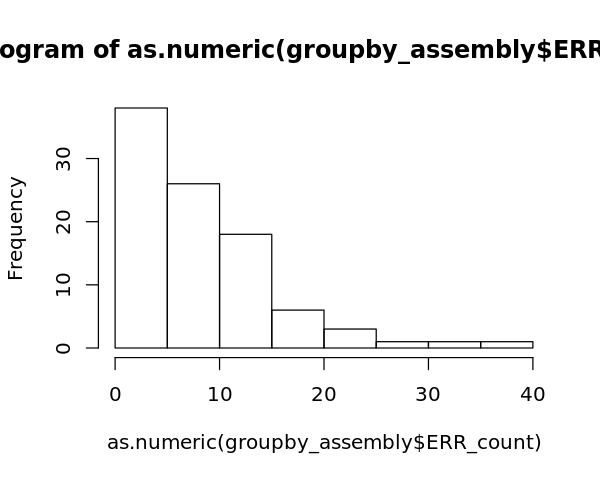

In [19]:
# Get assembly stats:
# range of samples to go into each assembly:
range(as.numeric(groupby_assembly$ERR_count))
# Total number of assemblies:
length(unique(groupby_assembly$Assembly_group))
# List of regional 'divisions' chosen for assembly:
unique(groupby_assembly$Sub_region)
hist(as.numeric(groupby_assembly$ERR_count))

In [31]:
# hist((as.numeric(groupby_region_feat_sizefrac$station_num)))
write.table(groupby_assembly, file="SampleList_ForAssembly.txt", , row.names=FALSE, quote=FALSE, sep="\t")

write.table(groupby_metat_assembly, file="SampleList_ForMetaT.txt", , row.names=FALSE, quote=FALSE, sep="\t")
